In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from financepy.models.black import *
from financepy.utils.global_types import *

####################################################################
#  FINANCEPY BETA Version 0.370 - This build: 28 Oct 2024 at 20:26 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



### Setting up

In [2]:
K = 100
q = 0.03
r = 0.02
ivol = 0.20
model = Black(ivol)

T1m = 1.0/12; T6m = 1/2; T1y = 1
DF1m = np.exp(-r*T1m); DF6m = np.exp(-r*T6m); DF1y = np.exp(-r*T1y)

Spots = np.linspace(60,140,100)
forward1m = [S*np.exp(-q*T1m)/DF1m for S in Spots]
forward6m = [S*np.exp(-q*T6m)/DF6m for S in Spots]
forward1y = [S*np.exp(-q*T1y)/DF1y for S in Spots]

### Figure 1 - Call and Put Delta

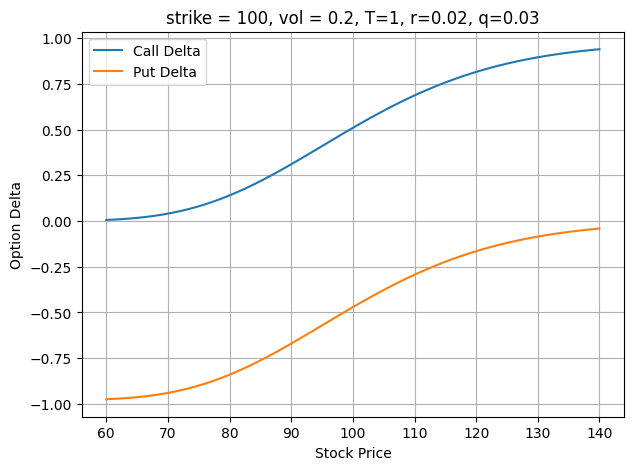

In [3]:
call_delta = [model.delta(f, K, T1y, DF1y, OptionTypes.EUROPEAN_CALL) for f in forward1y]
put_delta = [model.delta(f, K, T1y, DF1y, OptionTypes.EUROPEAN_PUT) for f in forward1y]
output = np.array([Spots, call_delta, put_delta])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'Call Delta', 'Put Delta']) 
df = df.set_index('S_0')
df.plot(grid=True, figsize=(7, 5))
plt.title("strike = 100, vol = 0.2, T=1, r=0.02, q=0.03")
plt.xlabel("Stock Price")
plt.ylabel("Option Delta")
#plt.savefig("L3_Fig1.png")
plt.show()

### Figure 2 - Call Delta with various T

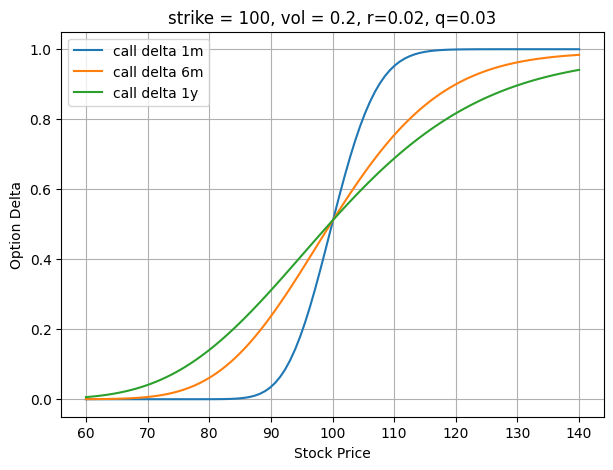

In [4]:
delta1m = [model.delta(f, K, T1m, DF1m, OptionTypes.EUROPEAN_CALL) for f in forward1m]
delta6m = [model.delta(f, K, T6m, DF6m, OptionTypes.EUROPEAN_CALL) for f in forward6m]
delta1y = [model.delta(f, K, T1y, DF1y, OptionTypes.EUROPEAN_CALL) for f in forward1y]
output = np.array([Spots, delta1m, delta6m, delta1y])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'call delta 1m', 'call delta 6m', 'call delta 1y']) 
df = df.set_index('S_0')
df.plot(grid=True, figsize=(7, 5))
plt.title("strike = 100, vol = 0.2, r=0.02, q=0.03")
plt.xlabel("Stock Price")
plt.ylabel("Option Delta")
#plt.savefig("L3_Fig2.png")
plt.show()

### Figure 3 - Call Delta time profile with various moneyness 

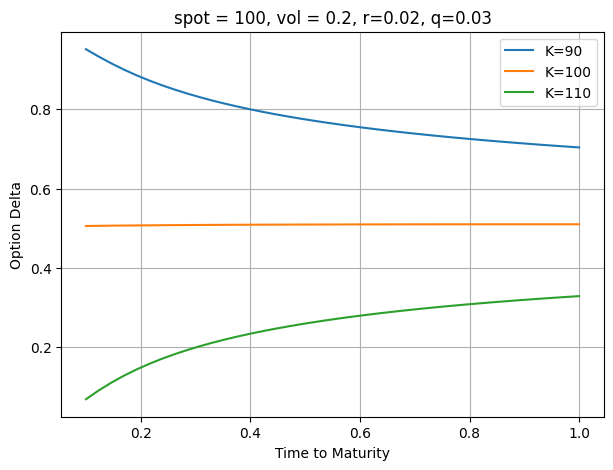

In [5]:
S0 = 100
time = np.linspace(0.1, 1, 40)
output = []
for t in time:    
    DF = np.exp(-r*t)
    forward = S0*np.exp(-q*t)/DF     
    delta_itm = model.delta(forward, K-10, t, DF, OptionTypes.EUROPEAN_CALL) 
    delta_atm = model.delta(forward, K   , t, DF, OptionTypes.EUROPEAN_CALL) 
    delta_otm = model.delta(forward, K+10, t, DF, OptionTypes.EUROPEAN_CALL)     
    output.append((t, delta_itm, delta_atm, delta_otm))

res_df = pd.DataFrame(output, columns =['time to maturity', 'K=90', 'K=100', 'K=110'])                                             
res_df = res_df.set_index('time to maturity') 
res_df.plot(grid=True, figsize=(7, 5))
plt.title("spot = 100, vol = 0.2, r=0.02, q=0.03")
plt.xlabel("Time to Maturity")
plt.ylabel("Option Delta")
#plt.savefig("L3_Fig3.png")
plt.show()

### Figure 4 - Call Gamma with various maturities

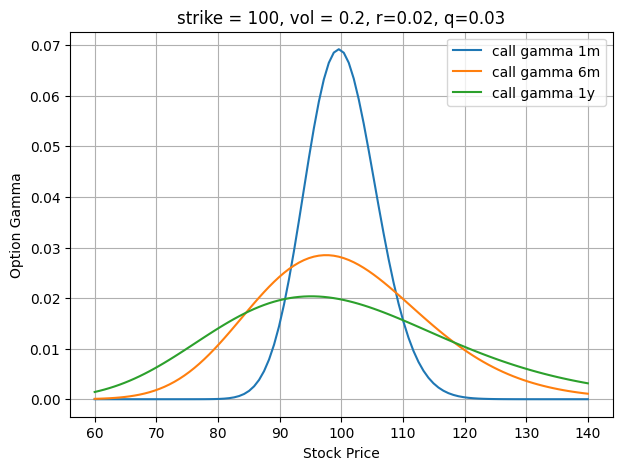

In [6]:
gamma1m = [model.gamma(f, K, T1m, DF1m, OptionTypes.EUROPEAN_CALL) for f in forward1m]
gamma6m = [model.gamma(f, K, T6m, DF6m, OptionTypes.EUROPEAN_CALL) for f in forward6m]
gamma1y = [model.gamma(f, K, T1y, DF1y, OptionTypes.EUROPEAN_CALL) for f in forward1y]
output = np.array([Spots, gamma1m, gamma6m, gamma1y])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'call gamma 1m', 'call gamma 6m', 'call gamma 1y']) 
df = df.set_index('S_0')
df.plot(grid=True, figsize=(7, 5))
plt.title("strike = 100, vol = 0.2, r=0.02, q=0.03")
plt.xlabel("Stock Price")
plt.ylabel("Option Gamma")
#plt.savefig("L3_Fig4.png")
plt.show()

### Figure 5 - Gamma with various moneyess

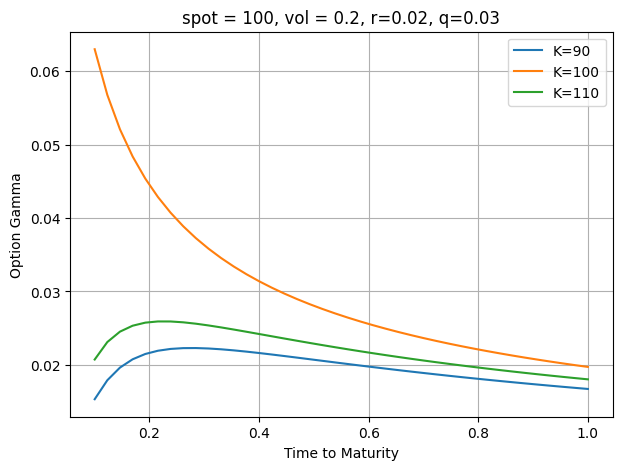

In [7]:
S0 = 100
time = np.linspace(0.1, 1, 40)
output = []
for t in time:    
    DF = np.exp(-r*t)
    forward = S0*np.exp(-q*t)/DF     
    gamma_itm = model.gamma(forward, K-10, t, DF, OptionTypes.EUROPEAN_CALL) 
    gamma_atm = model.gamma(forward, K   , t, DF, OptionTypes.EUROPEAN_CALL) 
    gamma_otm = model.gamma(forward, K+10, t, DF, OptionTypes.EUROPEAN_CALL)      
    output.append((t, gamma_itm, gamma_atm, gamma_otm))

res_df = pd.DataFrame(output, columns =['time to maturity', 'K=90', 'K=100', 'K=110'])                                             
res_df = res_df.set_index('time to maturity')    
res_df.plot(grid=True, figsize=(7, 5))
plt.title("spot = 100, vol = 0.2, r=0.02, q=0.03")
plt.xlabel("Time to Maturity")
plt.ylabel("Option Gamma")
#plt.savefig("L3_Fig5.png")
plt.show()

### Figure 6 - Vega for various maturities

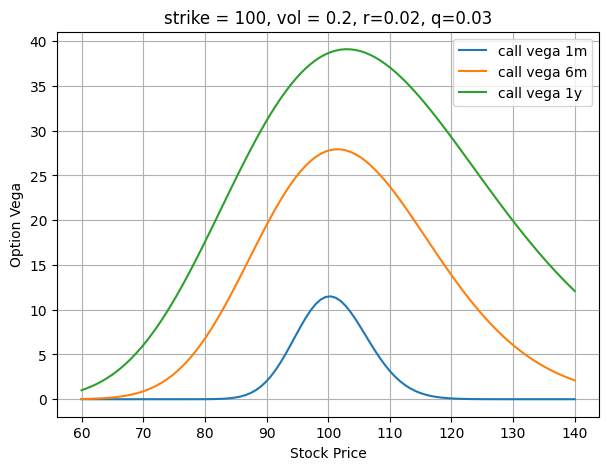

In [8]:
vega1m = [model.vega(f, K, T1m, DF1m, OptionTypes.EUROPEAN_CALL) for f in forward1m]
vega6m = [model.vega(f, K, T6m, DF6m, OptionTypes.EUROPEAN_CALL) for f in forward6m]
vega1y = [model.vega(f, K, T1y, DF1y, OptionTypes.EUROPEAN_CALL) for f in forward1y]
output = np.array([Spots, vega1m, vega6m, vega1y])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'call vega 1m', 'call vega 6m', 'call vega 1y']) 
df = df.set_index('S_0')
df.plot(grid=True, figsize=(7, 5))
plt.title("strike = 100, vol = 0.2, r=0.02, q=0.03")
plt.xlabel("Stock Price")
plt.ylabel("Option Vega")
#plt.savefig("L3_Fig6.png")
plt.show()

### Figure 7 - Vega with different moneyness

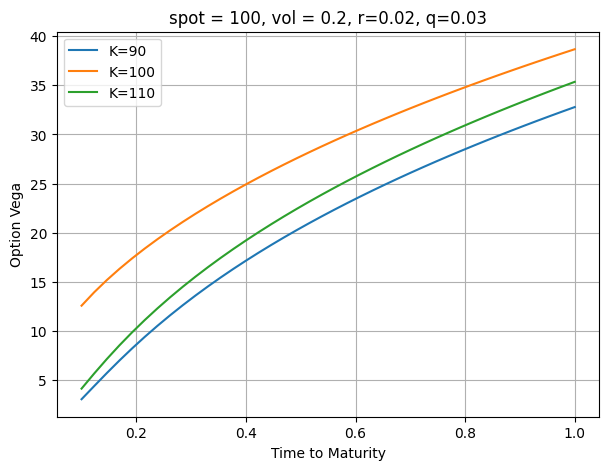

In [9]:
S0 = 100
time = np.linspace(0.1, 1, 40)
output = []
for t in time:    
    DF = np.exp(-r*t)
    forward = S0*np.exp(-q*t)/DF     
    vega_itm = model.vega(forward, K-10, t, DF, OptionTypes.EUROPEAN_CALL) 
    vega_atm = model.vega(forward, K   , t, DF, OptionTypes.EUROPEAN_CALL) 
    vega_otm = model.vega(forward, K+10, t, DF, OptionTypes.EUROPEAN_CALL)       
    output.append((t, vega_itm, vega_atm, vega_otm))

res_df = pd.DataFrame(output, columns =['time to maturity', 'K=90', 'K=100', 'K=110'])                                             
res_df = res_df.set_index('time to maturity')  
res_df.plot(grid=True, figsize=(7, 5))
plt.title("spot = 100, vol = 0.2, r=0.02, q=0.03")
plt.xlabel("Time to Maturity")
plt.ylabel("Option Vega")
#plt.savefig("L3_Fig7.png")
plt.show()

### Figure 8/9 - theta with various maturities

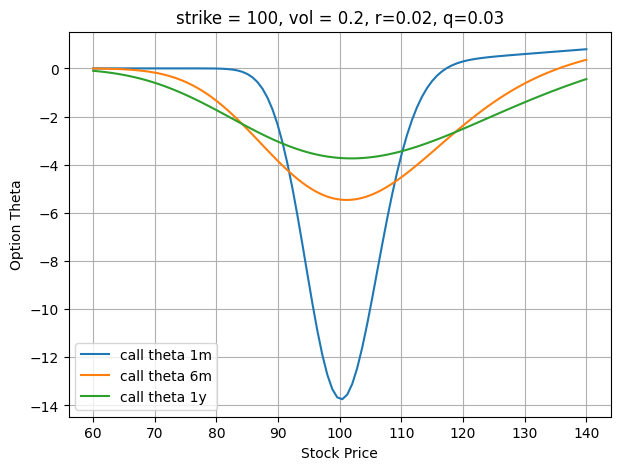

In [10]:
theta1m = [model.theta(f, K, T1m, DF1m, OptionTypes.EUROPEAN_CALL) for f in forward1m]
theta6m = [model.theta(f, K, T6m, DF6m, OptionTypes.EUROPEAN_CALL) for f in forward6m]
theta1y = [model.theta(f, K, T1y, DF1y, OptionTypes.EUROPEAN_CALL) for f in forward1y]
output = np.array([Spots, theta1m, theta6m, theta1y])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'call theta 1m', 'call theta 6m', 'call theta 1y']) 
df = df.set_index('S_0')
df.plot(grid=True, figsize=(7, 5))
plt.title("strike = 100, vol = 0.2, r=0.02, q=0.03")
plt.xlabel("Stock Price")
plt.ylabel("Option Theta")
#plt.savefig("L3_Fig9.png")
plt.show()

### Figure 10 - Theta with different moneyness

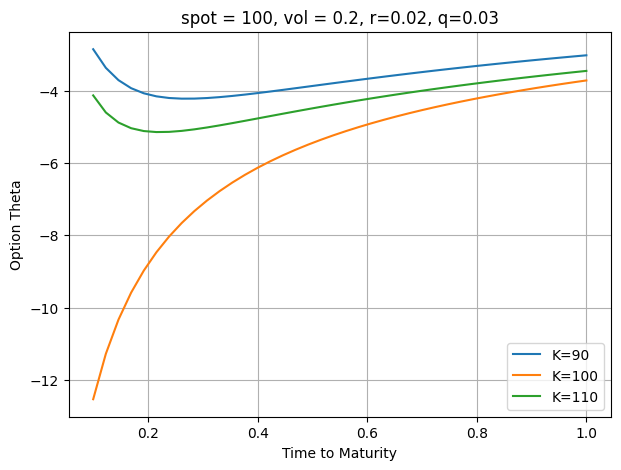

In [11]:
S0 = 100
time = np.linspace(0.1, 1, 40)
output = []
for t in time:    
    DF = np.exp(-r*t)
    forward = S0*np.exp(-q*t)/DF     
    theta_itm = model.theta(forward, K-10, t, DF, OptionTypes.EUROPEAN_CALL) 
    theta_atm = model.theta(forward, K   , t, DF, OptionTypes.EUROPEAN_CALL) 
    theta_otm = model.theta(forward, K+10, t, DF, OptionTypes.EUROPEAN_CALL)     
    output.append((t, theta_itm, theta_atm, theta_otm))

res_df = pd.DataFrame(output, columns =['time to maturity', 'K=90', 'K=100', 'K=110'])                                             
res_df = res_df.set_index('time to maturity')    
res_df.plot(grid=True, figsize=(7, 5))
plt.title("spot = 100, vol = 0.2, r=0.02, q=0.03")
plt.xlabel("Time to Maturity")
plt.ylabel("Option Theta")
#plt.savefig("L3_Fig10.png")
plt.show()

### Figure 11 - Delta, Gamma approximation

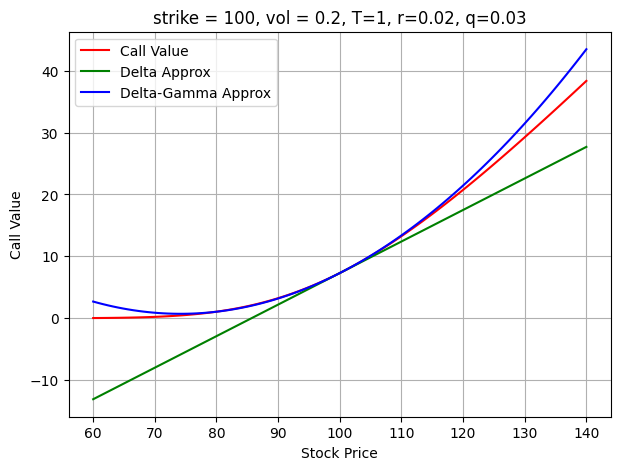

In [12]:
call_value = [model.value(f, K, T1y, DF1y, OptionTypes.EUROPEAN_CALL) for f in forward1y]
S0 = 100
DF = np.exp(-r*T1y)
forward = S0*np.exp(-q*T1y)/DF1y
call_value0 = model.value(forward, K, T1y, DF1y, OptionTypes.EUROPEAN_CALL)
call_delta0 = model.delta(forward, K, T1y, DF1y, OptionTypes.EUROPEAN_CALL)
call_gamma0 = model.gamma(forward, K, T1y, DF1y, OptionTypes.EUROPEAN_CALL)
dS = (Spots - S0)
dS_sq = dS ** 2
delta_approx =  call_value0 + call_delta0 * dS 
gamma_approx =  delta_approx + 0.5 * call_gamma0 * dS_sq
#--------------------------------------------------------------
output = np.array([Spots, call_value, delta_approx, gamma_approx])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'Call Value', 'Delta Approx', 'Delta-Gamma Approx']) 
df = df.set_index('S_0')
df.plot(grid=True, figsize=(7, 5), color=['red', 'green', 'blue'])
plt.title("strike = 100, vol = 0.2, T=1, r=0.02, q=0.03")
plt.xlabel("Stock Price")
plt.ylabel("Call Value")
#plt.savefig("L3_Fig11.png")
plt.show()

### Figure 12 - Digital Option

In [13]:
def digicall_payoff(forwards, T, DF, barrier, epsilon):    
    K_low = barrier-epsilon
    K_high = barrier+epsilon        
    call_low = [model.value(f, K_low, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
    call_high = [model.value(f, K_high, T, DF, OptionTypes.EUROPEAN_CALL) for f in forwards]
    digicall = [(low-high)/(2*epsilon) for low, high in zip(call_low, call_high) ]
    return digicall

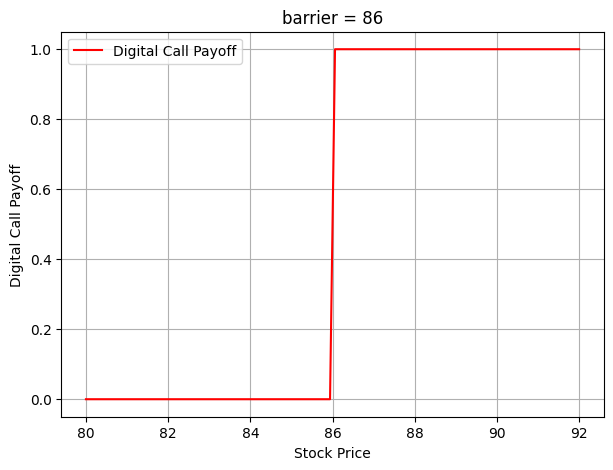

In [14]:
S0 = 100
barrier = 86
Spots = np.linspace(80,92,100)
digital_call_price = digicall_payoff(Spots, 1e-99, 1.0, barrier, 0.00001)

#--------------------------------------------------------------
output = np.array([Spots, digital_call_price])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'Digital Call Payoff']) 
df = df.set_index('S_0')
df.plot(grid=True, figsize=(7, 5), color=['red'])
plt.title("barrier = 86")
plt.xlabel("Stock Price")
plt.ylabel("Digital Call Payoff")
#plt.savefig("L3_Fig12.png")
plt.show()

### Fig 13 - Call Spread approx

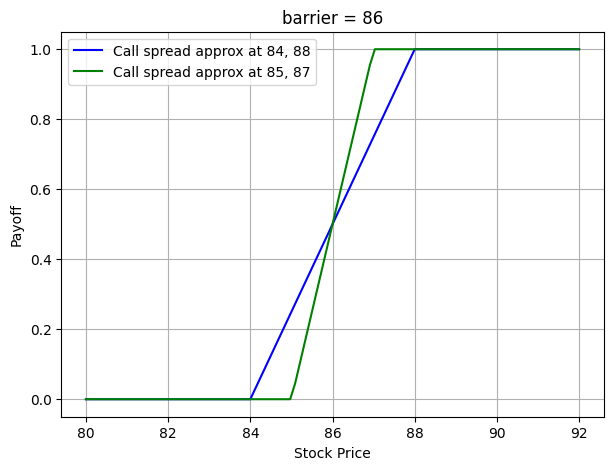

In [15]:
S0 = 100
barrier = 86
Spots = np.linspace(80,92,100)
epsilon = 2
digi_approx_1 = digicall_payoff(Spots, 1e-99, 1.0, barrier, epsilon)
epsilon = 1
digi_approx_2 = digicall_payoff(Spots, 1e-99, 1.0, barrier, epsilon)
#--------------------------------------------------------------
output = np.array([Spots, digi_approx_1, digi_approx_2])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'Call spread approx at 84, 88', 'Call spread approx at 85, 87']) 
df = df.set_index('S_0')
df.plot(grid=True, figsize=(7, 5), color=['blue', 'green'])
plt.title("barrier = 86")
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
#plt.savefig("L3_Fig13.png")
plt.show()

### Fig 14 - Call Spread price

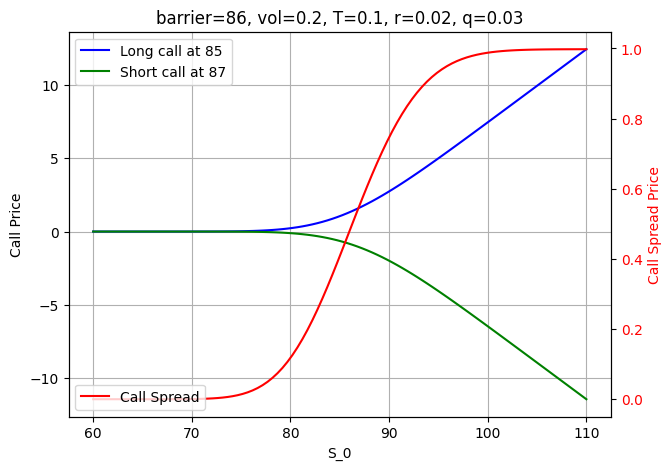

In [16]:
Spots = np.linspace(60,110,100)
barrier = 86
T01 = 0.1
DF01 = np.exp(-r*T01)
forwards = [S*np.exp(-q*T01)/DF01 for S in Spots]
epsilon = 1
call_value_lower = [model.value(f, barrier-epsilon, T01, DF01, OptionTypes.EUROPEAN_CALL)/(2*epsilon) for f in forwards]
call_value_upper = [-model.value(f, barrier+epsilon, T01, DF01, OptionTypes.EUROPEAN_CALL)/(2*epsilon) for f in forwards]
digi_approx_price = digicall_payoff(forwards, T01, DF01, barrier, epsilon)
#--------------------------------------------------------------
output = np.array([Spots, call_value_lower, call_value_upper])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'Long call at 85', 'Short call at 87']) 
df = df.set_index('S_0')
ax1 = df.plot(grid=True, figsize=(7, 5), color=['blue', 'green'])
ax1.set_ylabel('Call Price')
plt.title("barrier=86, vol=0.2, T=0.1, r=0.02, q=0.03")
ax2 = ax1.twinx() 
ax2.plot(Spots, digi_approx_price, color = 'red', label='Call Spread') 
ax2.set_ylabel('Call Spread Price', color = 'red') 
ax2.tick_params(axis ='y', labelcolor = 'red') 
ax2.legend(loc=3)
plt.xlabel("Stock Price")
#plt.savefig("L3_Fig14.png")
plt.show()

### Fig 15 - Call Spread Delta

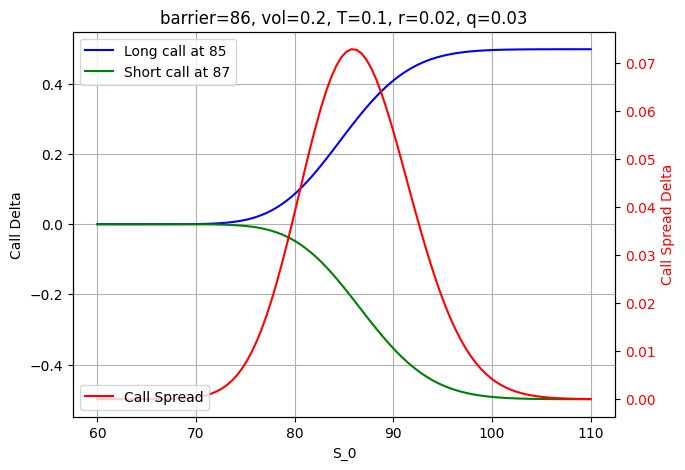

In [17]:
call_delta_lower = [model.delta(f, barrier-epsilon, T01, DF01, OptionTypes.EUROPEAN_CALL)/(2*epsilon) for f in forwards]
call_delta_upper = [-model.delta(f, barrier+epsilon, T01, DF01, OptionTypes.EUROPEAN_CALL)/(2*epsilon) for f in forwards]
digi_approx_delta = [low+high for low, high in zip(call_delta_lower, call_delta_upper) ]

#--------------------------------------------------------------
output = np.array([Spots, call_delta_lower, call_delta_upper])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'Long call at 85', 'Short call at 87']) 
df = df.set_index('S_0')
ax1 = df.plot(grid=True, figsize=(7, 5), color=['blue', 'green'])
ax1.set_ylabel('Call Delta')
plt.title("barrier=86, vol=0.2, T=0.1, r=0.02, q=0.03")
ax2 = ax1.twinx() 
ax2.plot(Spots, digi_approx_delta, color = 'red', label='Call Spread') 
ax2.set_ylabel('Call Spread Delta', color = 'red') 
ax2.tick_params(axis ='y', labelcolor = 'red') 
ax2.legend(loc=3)
plt.xlabel("Stock Price")
#plt.savefig("L3_Fig15.png")
plt.show()

### Fig 16 - Call Spread Vega

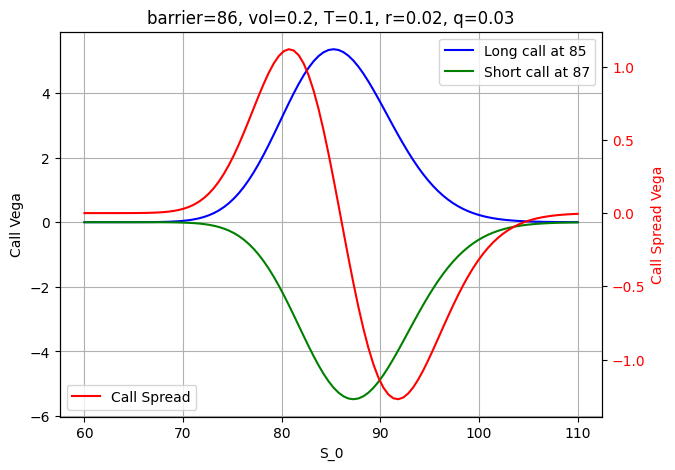

In [18]:
call_vega_lower = [model.vega(f, barrier-epsilon, T01, DF01, OptionTypes.EUROPEAN_CALL)/(2*epsilon) for f in forwards]
call_vega_upper = [-model.vega(f, barrier+epsilon, T01, DF01, OptionTypes.EUROPEAN_CALL)/(2*epsilon) for f in forwards]
digi_approx_vega = [low+high for low, high in zip(call_vega_lower, call_vega_upper) ]

#--------------------------------------------------------------
output = np.array([Spots, call_vega_lower, call_vega_upper])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'Long call at 85', 'Short call at 87']) 
df = df.set_index('S_0')
ax1 = df.plot(grid=True, figsize=(7, 5), color=['blue', 'green'])
ax1.set_ylabel('Call Vega')
plt.title("barrier=86, vol=0.2, T=0.1, r=0.02, q=0.03")
ax2 = ax1.twinx() 
ax2.plot(Spots, digi_approx_vega, color = 'red', label='Call Spread') 
ax2.set_ylabel('Call Spread Vega', color = 'red') 
ax2.tick_params(axis ='y', labelcolor = 'red') 
ax2.legend(loc=3)
plt.xlabel("Stock Price")
#plt.savefig("L3_Fig16.png")
plt.show()

### Fig 17 - Call Spread Gamma

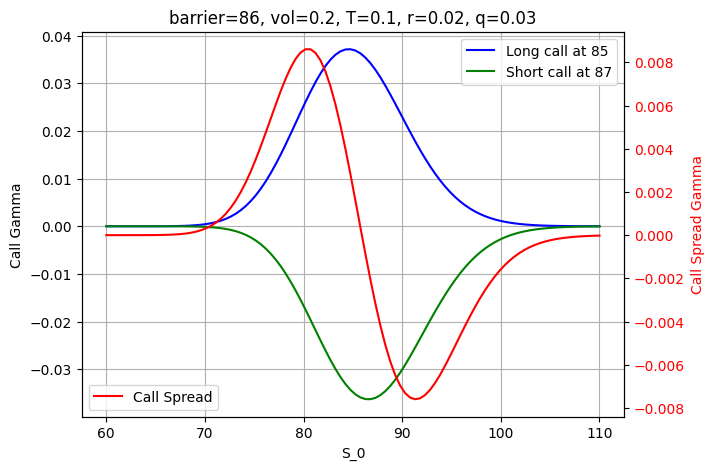

In [19]:
call_gamma_lower = [model.gamma(f, barrier-epsilon, T01, DF01, OptionTypes.EUROPEAN_CALL)/(2*epsilon) for f in forwards]
call_gamma_upper = [-model.gamma(f, barrier+epsilon, T01, DF01, OptionTypes.EUROPEAN_CALL)/(2*epsilon) for f in forwards]
digi_approx_gamma = [low+high for low, high in zip(call_gamma_lower, call_gamma_upper) ]

#--------------------------------------------------------------
output = np.array([Spots, call_gamma_lower, call_gamma_upper])
output = np.transpose(output)
df = pd.DataFrame(output, columns =['S_0', 'Long call at 85', 'Short call at 87']) 
df = df.set_index('S_0')
ax1 = df.plot(grid=True, figsize=(7, 5), color=['blue', 'green'])
ax1.set_ylabel('Call Gamma')
plt.title("barrier=86, vol=0.2, T=0.1, r=0.02, q=0.03")
ax2 = ax1.twinx() 
ax2.plot(Spots, digi_approx_gamma, color = 'red', label='Call Spread') 
ax2.set_ylabel('Call Spread Gamma', color = 'red') 
ax2.tick_params(axis ='y', labelcolor = 'red') 
ax2.legend(loc=3)
plt.xlabel("Stock Price")
#plt.savefig("L3_Fig17.png")
plt.show()